# Рекомендация тарифов

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы.
Описание данных
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
*   сalls — количество звонков,
*   minutes — суммарная длительность звонков в минутах,
*   messages — количество sms-сообщений,
*   mb_used — израсходованный интернет-трафик в Мб,
*   is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

Цель проекта - построить модель для задачи классификации, которая выберет подходящий тариф.
Предобработка данных не понадобится — данные уже предобработанны.

Для выполнения поставленной цели будут выполнены шаги: открыт и изучен файл, данные будут разбиты на выборки, будут исследованы модели, протестирована и проверена на адекватность лучшая модель.


## Открытие и изучение файла

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

In [ ]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [ ]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [ ]:
df.groupby('is_ultra').size()/len(df)

is_ultra
0    0.693528
1    0.306472
dtype: float64

In [ ]:
df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


In [ ]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


Данные содержат 3214 строк и 5 столбцов. Присутствует дисбаланс классов. Есть сильная корреляция между calls и minutes.

## Разбивка данных на выборки

In [ ]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

In [ ]:
np.random.seed(42)

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                            test_size=0.4,
                                                                            stratify=target)

In [ ]:
print(f"Количество строк в target_train по классам: {np.bincount(target_train)}")
print(f"Количество строк в target_test по классам: {np.bincount(target_test)}")

Количество строк в target_train по классам: [1337  591]
Количество строк в target_test по классам: [892 394]


In [ ]:
print(features_train.shape)
print(target_train.shape)

(1928, 4)
(1928,)


In [ ]:
print(features_test.shape)
print(target_test.shape)

(1286, 4)
(1286,)


In [ ]:
features_test, features_valid, target_test, target_valid = train_test_split(features_test, target_test,
                                                                            test_size=0.5,
                                                                            stratify=target_test)

In [ ]:
print(f"Количество строк в target_test по классам: {np.bincount(target_test)}")
print(f"Количество строк в target_valid по классам: {np.bincount(target_valid)}")

Количество строк в target_test по классам: [446 197]
Количество строк в target_valid по классам: [446 197]


In [ ]:
print(features_test.shape)
print(target_test.shape)

(643, 4)
(643,)


In [ ]:
print(features_valid.shape)
print(target_valid.shape)

(643, 4)
(643,)


## Исследование модели

In [ ]:
best_model_dt = None
best_result_dt = 0
depth = 0
list_train = []
list_valid = []
list_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in range(1,11):
    model_1 = DecisionTreeClassifier(random_state=12345, criterion='gini', max_depth=i)
    model_1.fit(features_train, target_train)
    list_train.append(model_1.score(features_train, target_train))
    result = model_1.score(features_valid, target_valid)
    list_valid.append(result)
    if result > best_result_dt:
        best_model_dt = model_1
        best_result_dt = result
        depth = i
print("Accuracy наилучшей модели на валидационной выборке:", best_result_dt, ', max_depth =', depth)

Accuracy наилучшей модели на валидационной выборке: 0.7947122861586314 , max_depth = 7


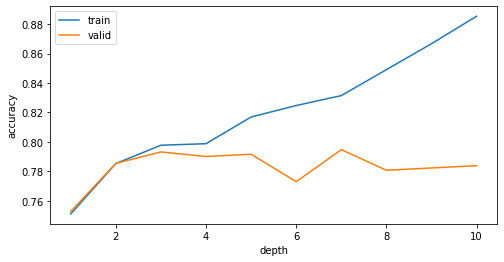

In [ ]:
plt.figure(figsize=(8,4))
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.plot(list_depth, list_train, label = 'train')
plt.plot(list_depth, list_valid, label = 'valid')
plt.legend();

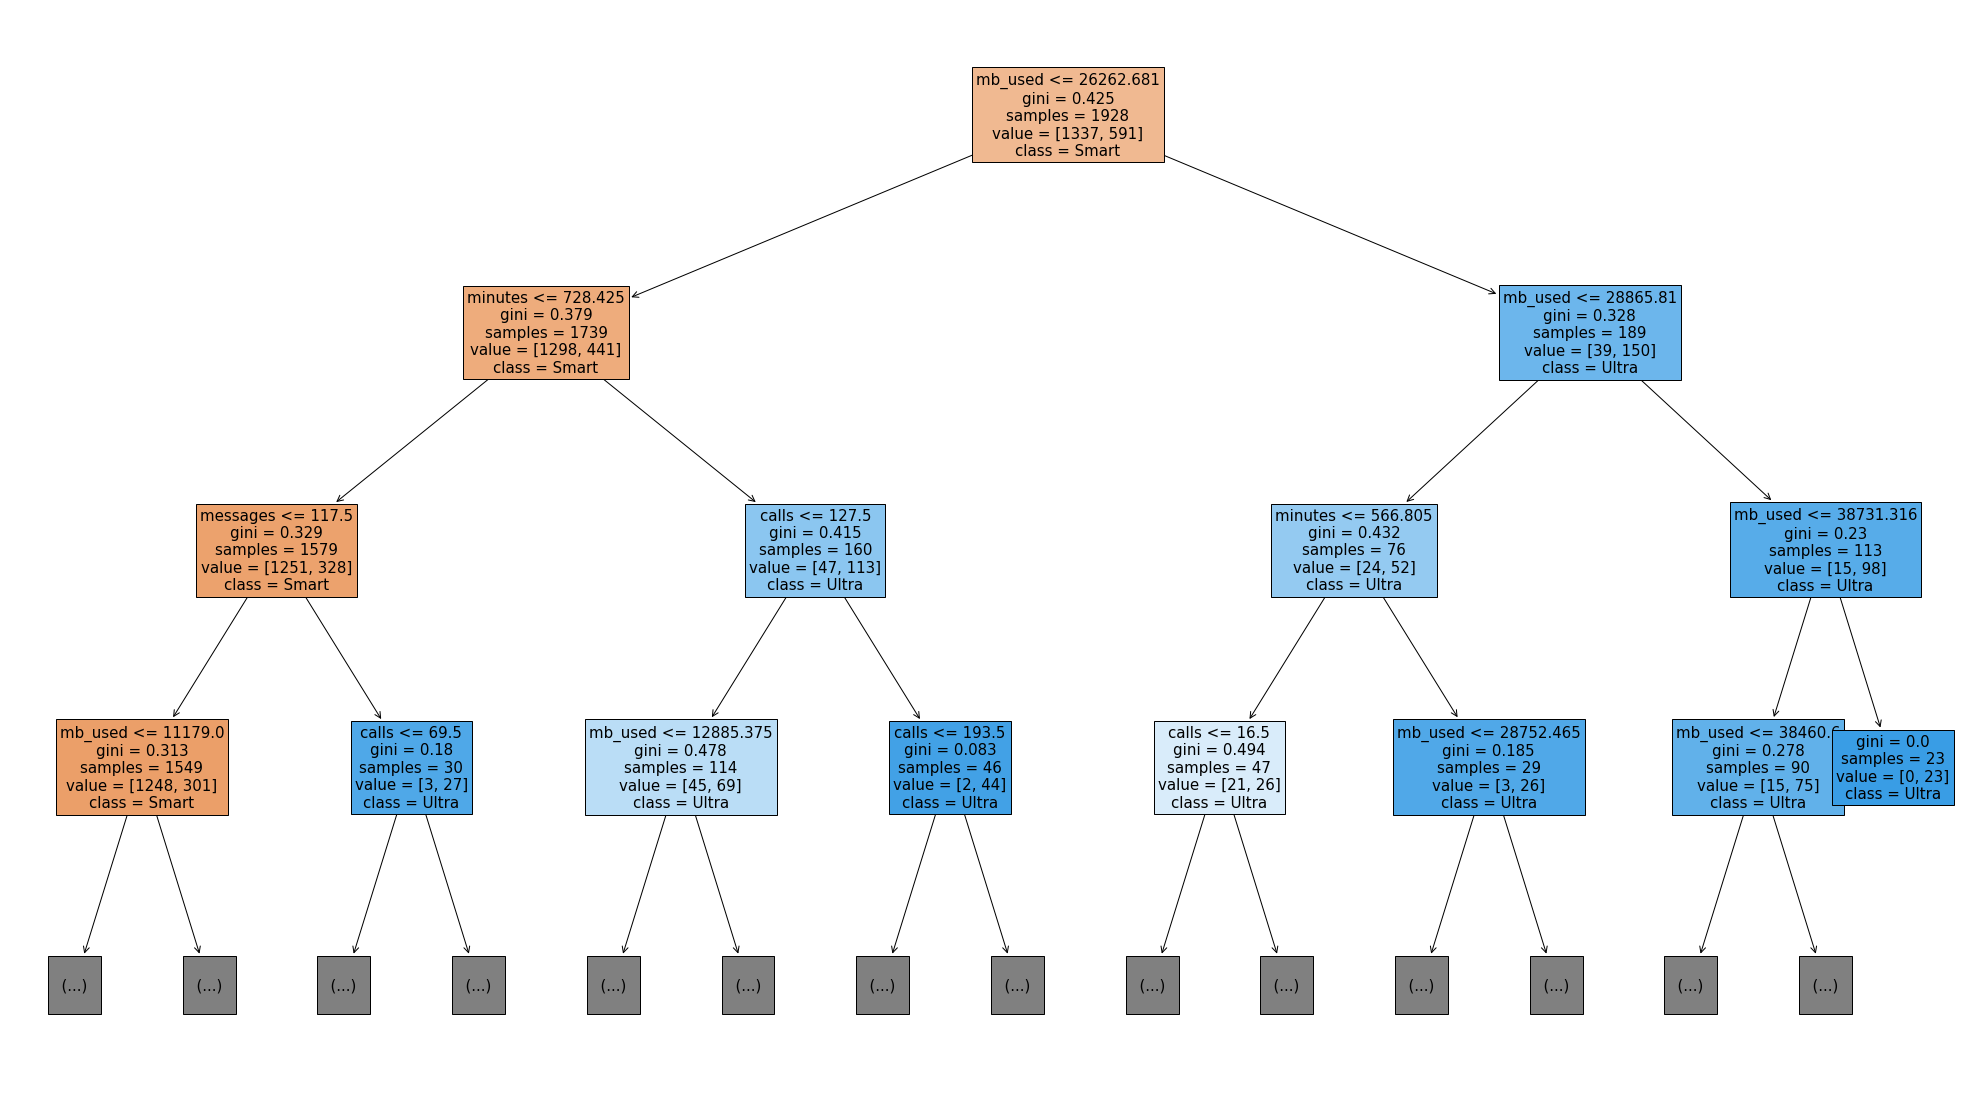

In [ ]:
fig = plt.figure(figsize=(35,20))
tree.plot_tree(best_model_dt,
               feature_names=features.columns.values,
               class_names=['Smart','Ultra'],
               filled=True,
               fontsize = 15,
               max_depth = 3
              );


In [ ]:
%%time
best_model = None
best_result = 0
n = 0
m = 0
for est in range(1, 15):
    for depth in range(1, 15):
        model_2 = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_2.fit(features_train, target_train)
        result = model_2.score(features_valid, target_valid)
        if result > best_result:
            best_model = model_2
            best_result = result
            n = est
            m = depth
print("Accuracy наилучшей модели на валидационной выборке:", best_result, ', n_estimators =', n, ', max_depth', m)

Accuracy наилучшей модели на валидационной выборке: 0.8133748055987559 , n_estimators = 13 , max_depth 10
CPU times: user 5.07 s, sys: 29.8 ms, total: 5.1 s
Wall time: 5.11 s


In [ ]:
model_3 = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
model_3.fit(features_train, target_train)
model_3.score(features_valid, target_valid)

0.6982892690513219

Наилучшие результаты с самым высоким качеством (аccuracy) у модели обученной алгоритмом RandomForest с параметром n_estimators = 13, max_depth =10.

## Проверка модели на тестовой выборке

In [ ]:
model = RandomForestClassifier(random_state=12345, n_estimators=13, max_depth=10)
model.fit(features_train, target_train)
model.score(features_test, target_test)

0.8040435458786936

In [ ]:
features_new = pd.concat([features_train, features_valid])
features_new.shape

(2571, 4)

In [ ]:
target_new = pd.concat([target_train, target_valid])
target_new.shape

(2571,)

In [ ]:
model_new = RandomForestClassifier(random_state=12345, n_estimators=13, max_depth=10)
model_new.fit(features_new, target_new)
model.score(features_test, target_test)

0.8040435458786936

- Лучшая модель протестирована и показала хороший результат.
- Модель с выбранными гиперпараметрами дополнительно обучена на тренировочной + валидационной выборке, результат не изменился.
- На основании данных прогнозов можно предлагать клиентам перейти на новый тариф, который им подойдет и их заинтересует.


## Проверка модели на адекватность

In [ ]:
model_dc = DummyClassifier(strategy='most_frequent', random_state=0)
model_dc.fit(features_train, target_train)
model_dc.score(features_test, target_test)

0.6936236391912908

Модель RandomForest с гиперпараметрами n_estimators = 13, max_depth =10 можно рекомендовать оператору мобильной связи для выбора подходящего клиенту тарифа. Таким образом это позволит компании сэкономить время и деньги, т.к. она сможет предлагать более выгодный для себя тариф только тем клиентам, которым он подходит.